**Table of contents**<a id='toc0_'></a>    
- [Проект: анализ бизнес-показателей](#toc1_)    
  - [Описание проекта](#toc1_1_)    
  - [Описание данных](#toc1_2_)    
  - [Загрузка данных](#toc1_3_)    
  - [Предобработка данных](#toc1_4_)    
  - [Задаем функции](#toc1_5_)    
    - [Функция get_profiles()](#toc1_5_1_)    
    - [Функция get_retention()](#toc1_5_2_)    
    - [Функция get_conversion()](#toc1_5_3_)    
    - [Функция get_ltv()](#toc1_5_4_)    
    - [Функция filter_data()](#toc1_5_5_)    
    - [Функция plot_retention()](#toc1_5_6_)    
    - [Функция plot_conversion()](#toc1_5_7_)    
    - [Функция plot_ltv_roi()](#toc1_5_8_)    
  - [Исследовательский анализ данных](#toc1_6_)    
    - [Профили пользователей. Минимальная и максимальная даты привлечения пользователей](#toc1_6_1_)    
    - [Страны, количество пользователей и доля платящих](#toc1_6_2_)    
    - [Устройства пользователей](#toc1_6_3_)    
    - [Рекламные источники и наиболее прибыльные каналы](#toc1_6_4_)    
  - [Маркетинг](#toc1_7_)    
    - [Общая сумма расходов на маркетинг](#toc1_7_1_)    
    - [Распределение трат по рекламным источникам](#toc1_7_2_)    
    - [Визуализация динамики изменения расходов во времени по источникам](#toc1_7_3_)    
    - [Средняя стоимость привлечения одного пользователя (САС)](#toc1_7_4_)    
  - [Анализ окупаемости рекламы](#toc1_8_)    
    - [Графики LTV и ROI, графики динамики LTV, CAC и ROI](#toc1_8_1_)    
    - [Конверсия пользователей и динамика её изменения](#toc1_8_2_)    
    - [Удержание пользователей и динамика его изменения](#toc1_8_3_)    
    - [Окупаемость рекламы с разбивкой по устройствам](#toc1_8_4_)    
    - [Окупаемость рекламы с разбивкой по странам](#toc1_8_5_)    
    - [Окупаемость рекламы с разбивкой по рекламным каналам](#toc1_8_6_)    
  - [Общий вывод](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Проект: анализ бизнес-показателей](#toc0_)
## <a id='toc1_1_'></a>[Описание проекта](#toc0_)
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.\
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Вам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## <a id='toc1_2_'></a>[Описание данных](#toc0_)
В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.\

Структура `visits_info_short.csv`:\
`User Id` — уникальный идентификатор пользователя,\
`Region` — страна пользователя,\
`Device` — тип устройства пользователя,\
`Channel` — идентификатор источника перехода,\
`Session Start` — дата и время начала сессии,\
`Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:\
`User Id` — уникальный идентификатор пользователя,\
`Event Dt` — дата и время покупки,\
`Revenue` — сумма заказа.

Структура `costs_info_short.csv`:\
`dt` — дата проведения рекламной кампании,\
`Channel` — идентификатор рекламного источника,\
`costs` — расходы на эту кампанию.

## <a id='toc1_3_'></a>[Загрузка данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
try:
    costs = pd.read_csv('costs_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    visits = pd.read_csv('visits_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

In [3]:
display(costs.head(10))
display(costs.info())
display('Пропуски в costs:')
display(costs.isna().sum())
display('Количество строк и столбцов:')
display(costs.shape)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'Пропуски в costs:'

dt         0
Channel    0
costs      0
dtype: int64

'Количество строк и столбцов:'

(1800, 3)

Изучая таблицу `costs`, отмечаем, что в столбце с датой данные представлены в типе `object`.

In [4]:
display(orders.head(10))
display(orders.info())
display('Пропуски в orders:')
display(orders.isna().sum())
display('Количество строк и столбцов:')
display(orders.shape)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Пропуски в orders:'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'Количество строк и столбцов:'

(40212, 3)

Изучая таблицу `orders`, отмечаем, что в столбце с временем данные представлены в типе `object`.

In [5]:
display(visits.head(10))
display(visits.info())
display('Пропуски в visits:')
display(visits.isna().sum())
display('Количество строк и столбцов:')
display(visits.shape)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Пропуски в visits:'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'Количество строк и столбцов:'

(309901, 6)

Изучая таблицу `visits`, отмечаем, что столбцы с временем содержат данные типа `object`.

Ознакомившись с предоставленными данными, мы отметили, что во всех трех таблицах необходимо привести столбцы с информацией о датах и времени событий к типу `datetime`. Также во всех трех таблицах следует скорректировать названия столбцов: привести к строчным буквам и заменить пробелы на нижнее подчеркивание. Сделаем это на этапе предобработки данных.\
Пропусков во всех трех таблицах нет.

## <a id='toc1_4_'></a>[Предобработка данных](#toc0_)

In [6]:
costs.columns = costs.columns.str.lower() 
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

In [7]:
display(costs.duplicated().sum())
display(orders.duplicated().sum())
display(visits.duplicated().sum())

0

0

0

Явных дубликатов во всех трех таблицах нет. Проверим, нет ли скрытых: для этого рассмотрим столбцы, имеющие текстовую информацию (нет ли там опечаток, разночтений названий, неправильно введенных данных).

In [8]:
costs.channel.value_counts()

FaceBoom              180
TipTop                180
OppleCreativeMedia    180
AdNonSense            180
MediaTornado          180
RocketSuperAds        180
lambdaMediaAds        180
LeapBob               180
WahooNetBanner        180
YRabbit               180
Name: channel, dtype: int64

In [9]:
visits.region.value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [10]:
visits.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [11]:
visits.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Информация в столбцах с идентификаторами перехода, странами и устройствами (из `visits`) и идентификаторами рекламного источника (`costs`) выглядит адекватно, без опечаток и ошибок. 

In [12]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

На этапе предобработки мы:
* привели названия столбцов к нижнему регистру и убрали пробелы
* проверили предоставленные датафреймы на явные и скрытые дубликаты
* привели к типу `datetime` столбцы предоставленных датафреймов, содержащие информацию о дате и времени 

## <a id='toc1_5_'></a>[Задаем функции](#toc0_)

Это функции для вычисления значений метрик:
* `get_profiles()` — для создания профилей пользователей,
* `get_retention()` — для подсчёта Retention Rate,
* `get_conversion()` — для подсчёта конверсии,
* `get_ltv()` — для подсчёта LTV.
 

### <a id='toc1_5_1_'></a>[Функция get_profiles()](#toc0_)

In [13]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### <a id='toc1_5_2_'></a>[Функция get_retention()](#toc0_)

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### <a id='toc1_5_3_'></a>[Функция get_conversion()](#toc0_)

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### <a id='toc1_5_4_'></a>[Функция get_ltv()](#toc0_)

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также функции для построения графиков:
* `filter_data()` — для сглаживания данных,
* `plot_retention()` — для построения графика Retention Rate,
* `plot_conversion()` — для построения графика конверсии,
* `plot_ltv_roi` — для визуализации LTV и ROI.

### <a id='toc1_5_5_'></a>[Функция filter_data()](#toc0_)

In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### <a id='toc1_5_6_'></a>[Функция plot_retention()](#toc0_)

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### <a id='toc1_5_7_'></a>[Функция plot_conversion()](#toc0_)

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### <a id='toc1_5_8_'></a>[Функция plot_ltv_roi()](#toc0_)

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## <a id='toc1_6_'></a>[Исследовательский анализ данных](#toc0_)
### <a id='toc1_6_1_'></a>[Профили пользователей. Минимальная и максимальная даты привлечения пользователей](#toc0_)

In [21]:
profiles = get_profiles(visits, orders, costs)
display(profiles.info())
display(profiles.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


None

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
58821,390248210438,2019-05-24 17:55:37,organic,Android,France,2019-05-24,2019-05-01,False,0.000000
60226,399551489703,2019-10-02 00:34:46,organic,PC,Germany,2019-10-02,2019-10-01,False,0.000000
75337,500003034204,2019-08-10 20:30:49,TipTop,PC,United States,2019-08-10,2019-08-01,False,2.954198
5028,33646329955,2019-05-27 14:16:39,MediaTornado,Android,United States,2019-05-27,2019-05-01,False,0.205714
31026,205984769239,2019-08-03 20:11:24,TipTop,iPhone,United States,2019-08-03,2019-08-01,False,3.000000
34658,230047295982,2019-05-21 05:32:38,organic,iPhone,Germany,2019-05-21,2019-05-01,False,0.000000
4422,29436507977,2019-07-23 17:18:47,FaceBoom,iPhone,United States,2019-07-23,2019-07-01,False,1.127273
139439,929773892601,2019-09-16 05:53:41,TipTop,iPhone,United States,2019-09-16,2019-09-01,False,3.536082
137714,918221716735,2019-06-16 19:14:29,organic,iPhone,United States,2019-06-16,2019-06-01,False,0.000000
110257,734401907398,2019-06-01 07:27:16,LeapBob,PC,France,2019-06-01,2019-06-01,False,0.206769


In [22]:
display('Минимальная дата привлечения пользователей: {}'.format(str(profiles['dt']
                                                                    .sort_values().values[0])))
display('Максимальная дата привлечения пользователей: {}'.format(str(profiles['dt']
                                                                     .sort_values(ascending=False).values[0])))

'Минимальная дата привлечения пользователей: 2019-05-01'

'Максимальная дата привлечения пользователей: 2019-10-27'

**Вывод:** Используя функцию `get_profiles`, мы получили профили 150008 пользователей.\
Также определили диапазон привлечения пользователей: с 1 мая 2019 по 27 октября 2019 гг. Выявленный нами на основании предоставленных данных временной диапазон привлечения пользователей совпадает с условиями проекта.

### <a id='toc1_6_2_'></a>[Страны, количество пользователей и доля платящих](#toc0_)

In [23]:
region = profiles.groupby('region') \
                 .agg({'user_id':'count'}) \
                 .sort_values(by = 'user_id', ascending = False)
region

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


Больше всего пользователей из США.

In [24]:
top_region = profiles.query('payer == True') \
                     .groupby('region') \
                     .agg({'user_id':'count'}) \
                     .sort_values(by = 'user_id', ascending = False)
top_region

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


Больше всего платящих пользователей из США.

In [25]:
top_region.columns = ['payer_id']
region = region.merge(top_region, on='region', how='left')
region['pay_percent'] = round(region['payer_id'] / region['user_id'],3) * 100
region

,user_id,payer_id,pay_percent
region,,,
United States,100002,6902,6.9
UK,17575,700,4.0
France,17450,663,3.8
Germany,14981,616,4.1


**Вывод:** Доля платящих из общего числа пользователей также больше в США.

### <a id='toc1_6_3_'></a>[Устройства пользователей](#toc0_)

In [26]:
device = profiles.groupby('device') \
                 .agg({'user_id':'count'}) \
                 .sort_values(by = 'user_id', ascending = False)
device

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


iPhone — наиболее популярное устройство.

In [27]:
top_device = profiles.query('payer == True') \
                     .groupby('device').agg({'user_id':'count'}) \
                     .sort_values(by = 'user_id', ascending = False)
top_device

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


Среди платящих iPhone так же является самым популярным устройством.

In [28]:
top_device.columns = ['payer_id']
device = device.merge(top_device, on = 'device', how = 'left')
device['pay_percent'] = round(device['payer_id'] / device['user_id'],3) * 100
device

,user_id,payer_id,pay_percent
device,,,
iPhone,54479,3382,6.2
Android,35032,2050,5.9
PC,30455,1537,5.0
Mac,30042,1912,6.4


**Вывод:** iPhone является самым популярным устройством пользователей, и среди пользователей iPhone самая большая доля платящих пользователей.

### <a id='toc1_6_4_'></a>[Рекламные источники и наиболее прибыльные каналы](#toc0_)

In [29]:
channel = profiles.groupby('channel') \
                  .agg({'user_id':'count'}) \
                  .sort_values(by='user_id', ascending = False)
channel

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


Больше всего "органических" пользователей, т.е. тех, кто начал пользоваться приложением самостоятельно, без рекламы.

In [30]:
top_channel = profiles.query('payer == True') \
                      .groupby('channel') \
                      .agg({'user_id':'count'}) \
                      .sort_values(by = 'user_id', ascending = False)
top_channel

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


Наибольшее количество платящих пользователей пришли из FaceBoom, меньше всего привел MediaTornado.

In [31]:
top_channel.columns = ['payer_id']
channel = channel.merge(top_channel, on = 'channel', how = 'left')
channel['pay_percent'] = round(channel['payer_id'] / channel['user_id'],3)
display(channel.sort_values(by = 'pay_percent', ascending = False))

,user_id,payer_id,pay_percent
channel,,,
FaceBoom,29144,3557,0.122
AdNonSense,3880,440,0.113
lambdaMediaAds,2149,225,0.105
TipTop,19561,1878,0.096
RocketSuperAds,4448,352,0.079
WahooNetBanner,8553,453,0.053
YRabbit,4312,165,0.038
MediaTornado,4364,156,0.036
LeapBob,8553,262,0.031


**Вывод:** Больше всего пользователей вообще и в частности платящих привел FaceBoom: среди пользователей из этого источника самый большой процент платящих — 12,2%.\
Меньшая доля платящих у OppleCreativeMedia: из всей привлеченной этим источником массы пользователей всего 2,7% платят.\
Самая малая доля платящих у "органических" пользователей — 2,1%.

## <a id='toc1_7_'></a>[Маркетинг](#toc0_)

### <a id='toc1_7_1_'></a>[Общая сумма расходов на маркетинг](#toc0_)

In [32]:
total_costs = round(costs['costs'].sum(), 2)
print('Общая сумма расходов на маркетинг: {}'. format(total_costs))

Общая сумма расходов на маркетинг: 105497.3


### <a id='toc1_7_2_'></a>[Распределение трат по рекламным источникам](#toc0_)

In [33]:
channel_costs = profiles.groupby('channel') \
                        .agg({'acquisition_cost':'sum'}) \
                        .sort_values(by = 'acquisition_cost', ascending = False)
channel_costs

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:** общая сумма расходов на рекламу составила 105497.3, из которых почти половина ушла на TipTop — 54751.3. Второй по затратам — FaceBoom, стоивший 32445.6.

### <a id='toc1_7_3_'></a>[Визуализация динамики изменения расходов во времени по источникам](#toc0_)

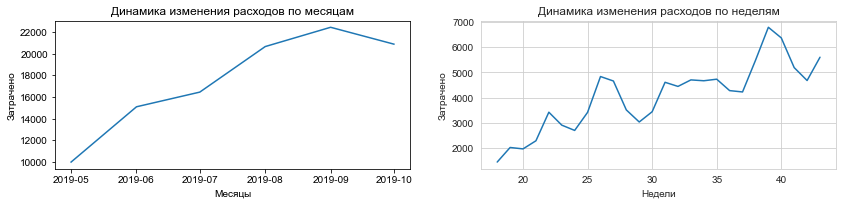

In [34]:
costs_month = profiles.groupby('month') \
                      .agg({'acquisition_cost':'sum'}) \
                      .sort_values(by = 'month').reset_index()

profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week
costs_week = profiles.groupby('week') \
                      .agg({'acquisition_cost':'sum'}) \
                      .sort_values(by = 'week').reset_index()

plt.figure(figsize=(14,6))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x = 'month', y = 'acquisition_cost', data = costs_month)
sns.set_style("whitegrid")
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Затрачено')


ax2 = plt.subplot(2, 2, 2)
ax2 = sns.lineplot(x = 'week', y = 'acquisition_cost', data = costs_week)
sns.set_style("whitegrid")
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Недели')
plt.ylabel('Затрачено')


plt.show()

На данных графиках представлена динамика изменения общих расходов на маркетинг по месяцам и по неделям. Видим тенденцию к росту на обоих графиках, при этом понедельный график представлен кривой, имеющей участки роста и спада трат.

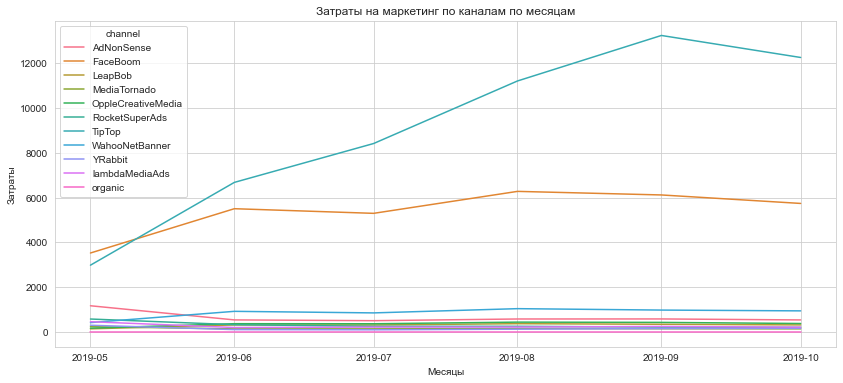

In [35]:
costs_month_channel = profiles.pivot_table(index = ['channel','month'], values = 'acquisition_cost', aggfunc = 'sum')
plt.figure(figsize = (14,6))
sns.lineplot(x = 'month', y = 'acquisition_cost', data = costs_month_channel, hue = 'channel')
sns.set_style("whitegrid")
plt.title('Затраты на маркетинг по каналам по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты')
plt.show()

На данном графике представлена динамика изменения расходов на маркетинг по каналам по месяцам в исследуемом промежутке — с мая 2019 по октябрь 2019 года.\
На предыдущем этапе мы выявили самые затратные источники: TipTop и FaceBoom. График позволяет нам более наглядно и в динамике пронаблюдать, сколько средств было вложено в эти источники трафика. Траты на TipTop увеличивались каждый месяц, тогда как на FaceBoom относительно немного подросли с момента начала анализа и оставались на протяжение всего периода наблюдения около 6000 в месяц.\
Иные источники трафика получали не такое большое финансирование в указанный период времени и потому представлены на графике практически прямыми линиями в нижней части графика.

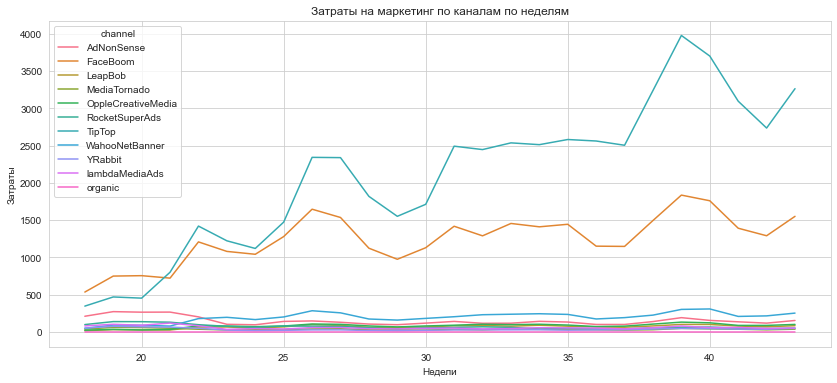

In [36]:
costs_weeks_channel = profiles.pivot_table(index = ['channel','week'], values = 'acquisition_cost', aggfunc = 'sum')
plt.figure(figsize = (14,6))
sns.lineplot(x = 'week', y = 'acquisition_cost', data = costs_weeks_channel, hue = 'channel')
sns.set_style("whitegrid")
plt.title('Затраты на маркетинг по каналам по неделям')
plt.xlabel('Недели')
plt.ylabel('Затраты')
plt.show()

График с динамикой трат по неделям на различные каналы трафика позволяет более детально отследить траты. Видим те же тенденции, что и на графике с месячной динамикой: траты на TipTop выше, чем на FaceBoom, хотя затраты на оба источника начинаются с близких сумм. График затрат на TipTop восходит увереннее, тогда как кривая трат на FaceBoom более пологая, но оба источника имели схожие и, видимо, одномоментные точки вливания средств, на графике представленные пиками.\
Как и на предыдущем графике, остальные источники получали гораздо более скромное финансирование, потому находятся в самом низу и представлены слабо кривыми линиями.

**Вывод:** рассмотрев графики динамики изменения трат на различные источники трафика по месяцам и неделям, видим, что на протяжение исследуемого периода (с мая 2019 по октябрь 2019) траты на рекламу в TipTop росли с пиком в сентябре, однако ранее мы выяснили, что доля платящих клиентов, привлеченных по этому каналу, невелика и составляет 9,6%. По этому параметру TipTop занимает четвертое место.\
FaceBoom, занимающий второе место по общим тратам на рекламу после TipTop, находится на первом месте по количеству привлеченных платящих пользователей, при этом расходы на рекламу по этому каналу меняются слабо в исследуемом промежутке времени.

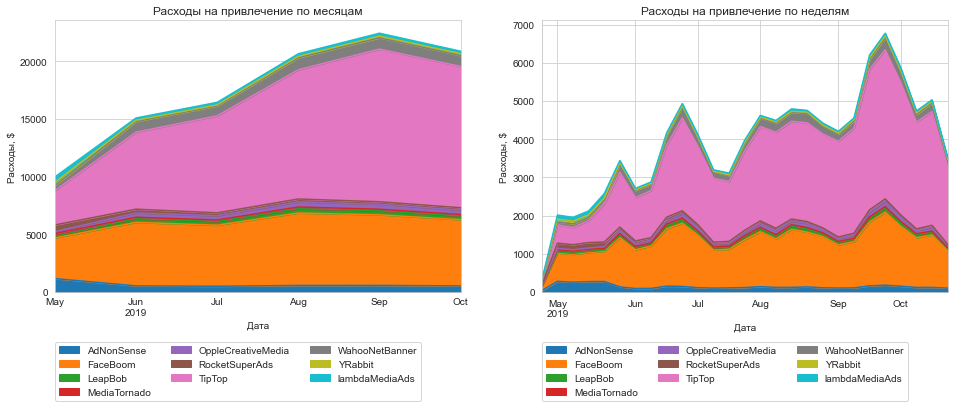

In [37]:


# Код ревьюера
costs['Расходы на привлечение по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['Расходы на привлечение по неделям'] = costs['dt'].astype('datetime64[W]')

columns = ['Расходы на привлечение по месяцам', 'Расходы на привлечение по неделям']

plt.subplots(figsize = (16, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', 
                      aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
    plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.show()

### <a id='toc1_7_4_'></a>[Средняя стоимость привлечения одного пользователя (САС)](#toc0_)

In [38]:
channel_user = profiles.groupby('channel').agg({'user_id':'count'})
channel_costs = channel_costs.merge(channel_user, on = 'channel', how = 'left')
channel_costs['costs_user'] = round(channel_costs['acquisition_cost'] / channel_costs['user_id'], 3)
channel_costs = channel_costs.sort_values(by='costs_user', ascending=False)
display(channel_costs)
print('Средняя стоимость привлечения пользователя по всем каналам = {}' \
      .format(round(profiles['acquisition_cost'].sum()/profiles['user_id'].count(), 3)))

,acquisition_cost,user_id,costs_user
channel,,,
TipTop,54751.30,19561,2.799
FaceBoom,32445.60,29144,1.113
AdNonSense,3911.25,3880,1.008
lambdaMediaAds,1557.60,2149,0.725
WahooNetBanner,5151.00,8553,0.602
RocketSuperAds,1833.00,4448,0.412
OppleCreativeMedia,2151.25,8605,0.250
MediaTornado,954.48,4364,0.219
YRabbit,944.22,4312,0.219


Средняя стоимость привлечения пользователя по всем каналам = 0.703


**Вывод:** самые дорогие пользователи из канала TipTop, на втором месте по стоимости пользователя — FaceBoom, на третьем — AdNonSense.\
Средняя стоимость привлечения одного пользователя составляет 0.703.

## <a id='toc1_8_'></a>[Анализ окупаемости рекламы](#toc0_)

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. За момент анализа примем 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Значит, горизонт анализа — 14 дней. \
На этом этапе мы ответим на вопросы:
* Окупается ли реклама, направленная на привлечение пользователей в целом?
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

In [39]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_notorganic = profiles.query('channel != "organic"')

Исключим органический трафик из анализа, поскольку мы оцениваем окупаемость рекламы: нас интересует, покрывает ли прибыль от платящих пользователей расходы на рекламу.\
На органический трафик затрат не было, процент платящих пользователей в этой категории — самый низкий, и составляет 2,1%.

### <a id='toc1_8_1_'></a>[Графики LTV и ROI, графики динамики LTV, CAC и ROI](#toc0_)

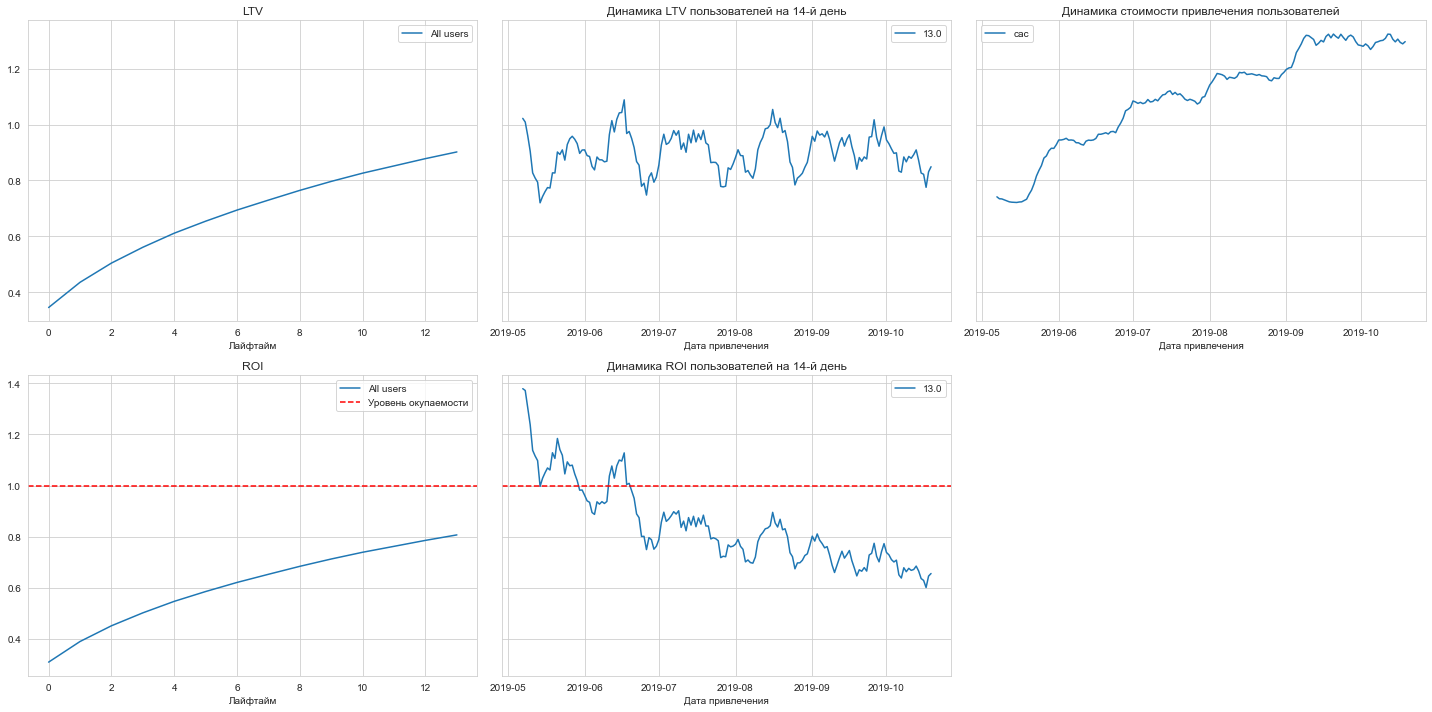

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( \
    profiles_notorganic, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**
* LTV стабильно растет.
* LTV в динамике достаточно стабилен, хотя имеет периодические колебания.
* График динамики САС имеет восходящую тенденцию. Вероятно, рост трат на рекламу не окупается: приток пользователей не покрывает траты на рекламу.
* ROI составляет 80% и не доходит до уровня окупаемости, из чего делаем вывод, что реклама не окупается.
* График динамики ROI имеет нисходящую тенденцию с падением ниже уровня окупаемости к 14-му дню, что может говорить о проблеме с удержанием.

### <a id='toc1_8_2_'></a>[Конверсия пользователей и динамика её изменения](#toc0_)

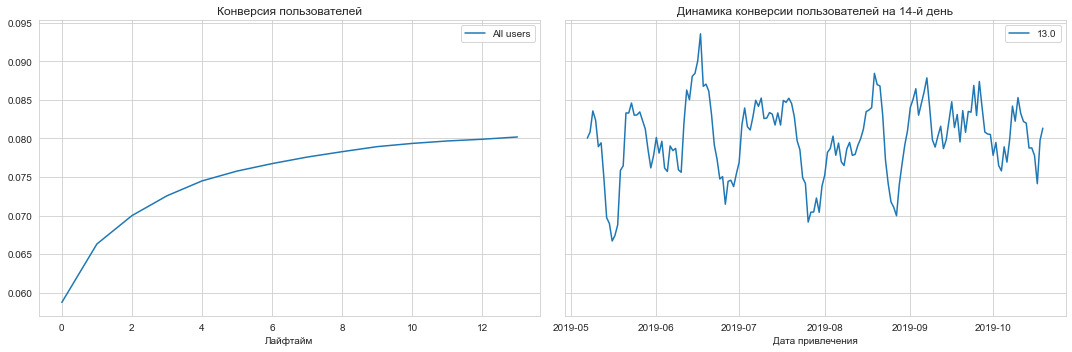

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion( \
    profiles_notorganic, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**
* Конверсия составляет 8%, что является достаточно хорошим показателем.
* График динамики конверсии достаточно стабилен, заметен рост конверсии после привлечения пользователей с последующим спадом, за которым следует новый раунд привлечения пользователей. Выше мы сделали вывод, что имеет место проблема в удержании пользователей. Этот график также косвенно говорит нам об этом.

### <a id='toc1_8_3_'></a>[Удержание пользователей и динамика его изменения](#toc0_)

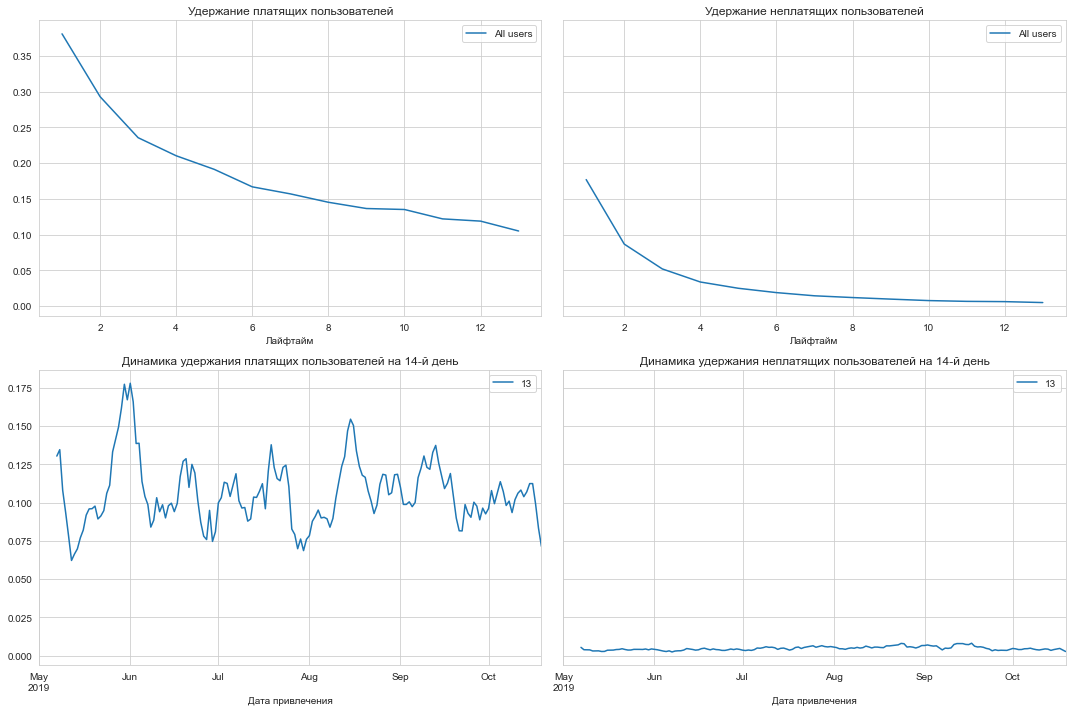

In [42]:
retention_raw, retention_grouped, retention_history = get_retention( \
    profiles_notorganic, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
* Графики удержания неплатящих и платящих пользователей имеют похожую нисходящую форму, однако разные показатели: платящие пользователи удерживаются лучше, чем неплатящие.
* Динамика удержания умеренно стабильна и имеет подъемы и спады, не связанные с датами привлечения. Требуется дополнительная информация, чтобы можно было судить о причинах оттока пользователей.

### <a id='toc1_8_4_'></a>[Окупаемость рекламы с разбивкой по устройствам](#toc0_)

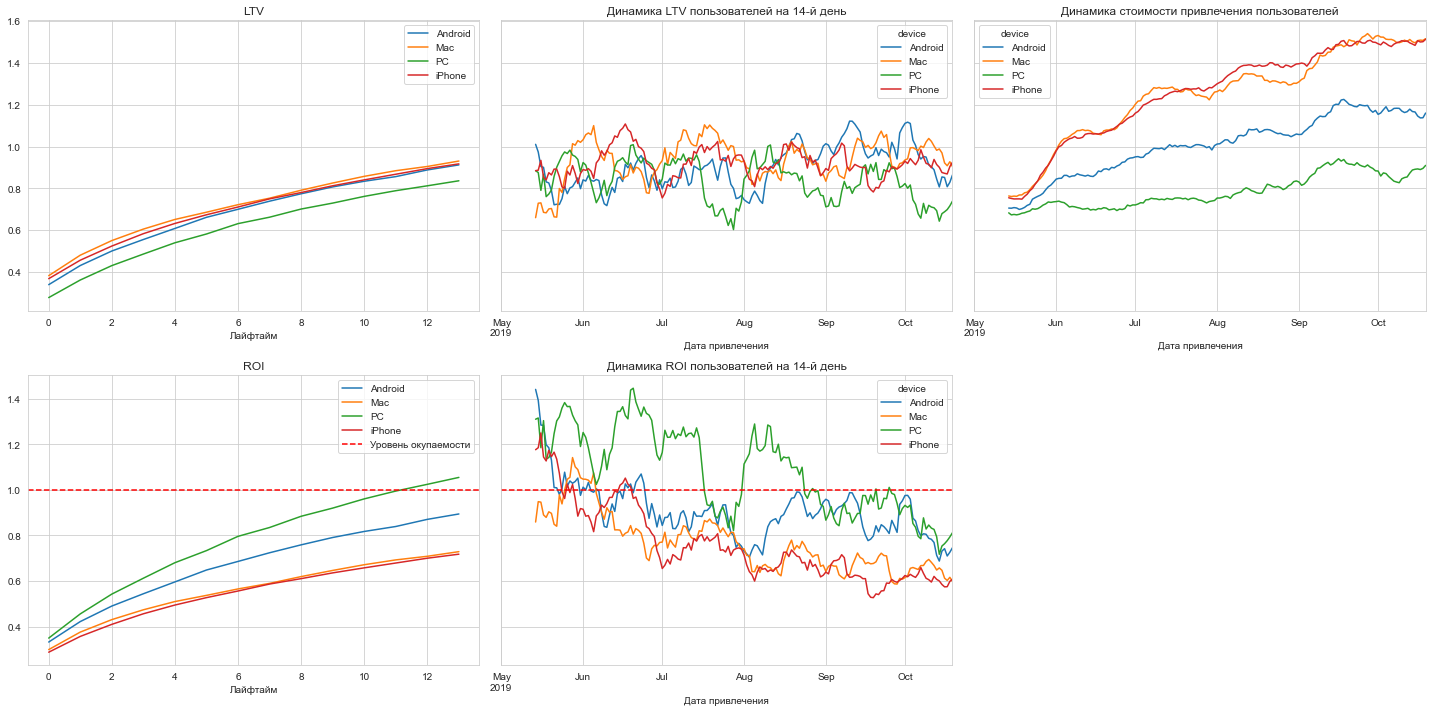

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( \
    profiles_notorganic, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы:**
* САС пользователей iPhone и Mac самая высокая и растет, привлечение пользователей PC обходится дешевле всего. Однако в целом привлечение пользователей всех устройств растет.
* LTV с разбивкой по устройствам достаточно стабилен, во всех когортах есть взлеты и спады. Можем сделать вывод, что дело не в пользователях конкретных устройств.
* ROI когорты пользователей PC пересекает линию уровня окупаемости на графике, что позволяет нам судить о том, что реклама для этой когорты окупается.
* Динамика ROI имеет нисходящую тенденцию по устройствам, при этом для пользователей PC ROI достаточно долго находится выше и рядом с линией уровня окупаемости.
* Явных аномалий при исследовании метрик по устройствам мы не выявили.

### <a id='toc1_8_5_'></a>[Окупаемость рекламы с разбивкой по странам](#toc0_)

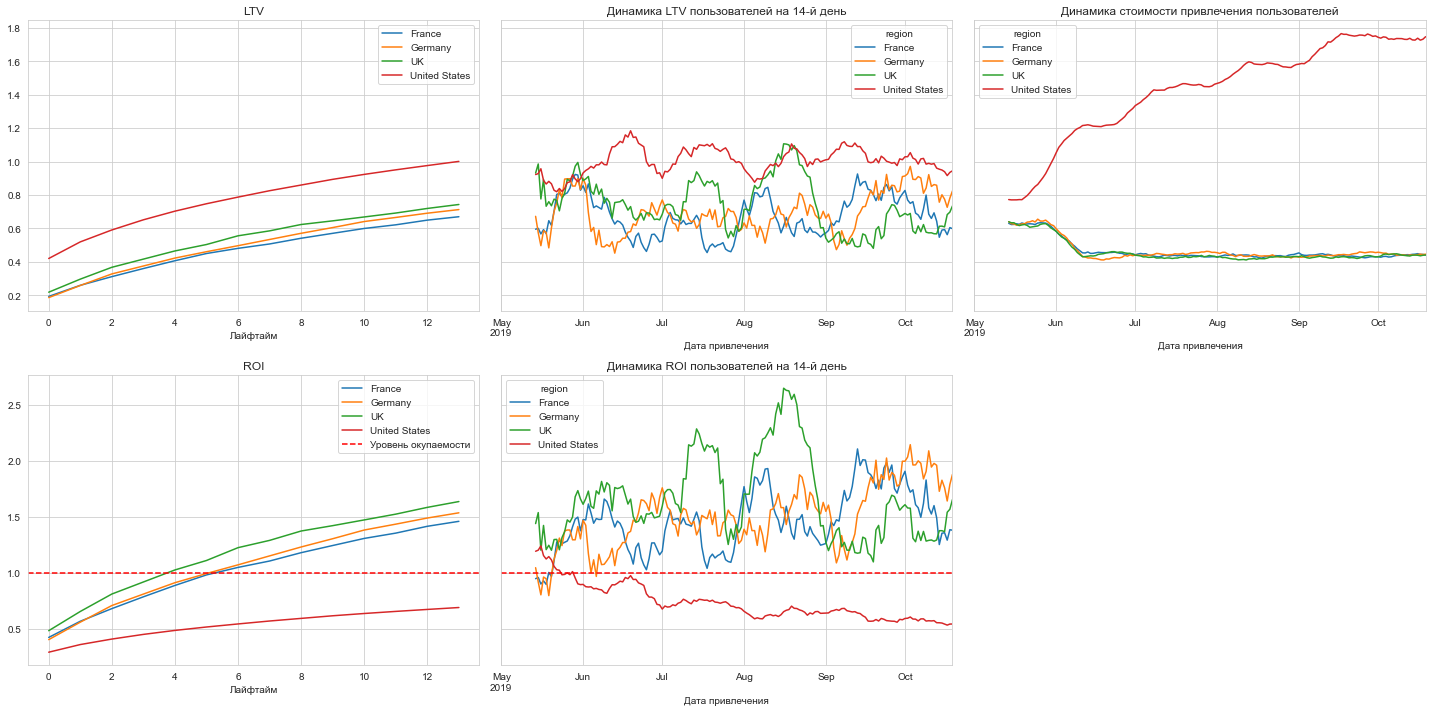

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( \
    profiles_notorganic, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы:**
* LTV пользователей из США в два раза выше LTV пользователей других регионов. График динамики LTV пользователей из США имеет колебания, однако он выше остальных кривых и стабильнее.
* Стоимость привлечения пользователей из США изначально выше и постоянно растет, тогда как привлечение пользователей других регионов выборки примерно одинаково.
* Затраты на привлечение пользователей из Великобритании, Германии и Франции окупаются на 4-5 день, в отличие от трат на пользователей из США.
* На 14-й день ROI пользователей из Великобритании, Германии и Франции выше уровня окупаемости, в отличие от ROI пользователей из США.

Получается, что пользователи из США самые дорогие в привлечении, при этом они приносят самый высокий доход, однако тот не покрывает траты на привлечение этой категории пользователей.

### <a id='toc1_8_6_'></a>[Окупаемость рекламы с разбивкой по рекламным каналам](#toc0_)

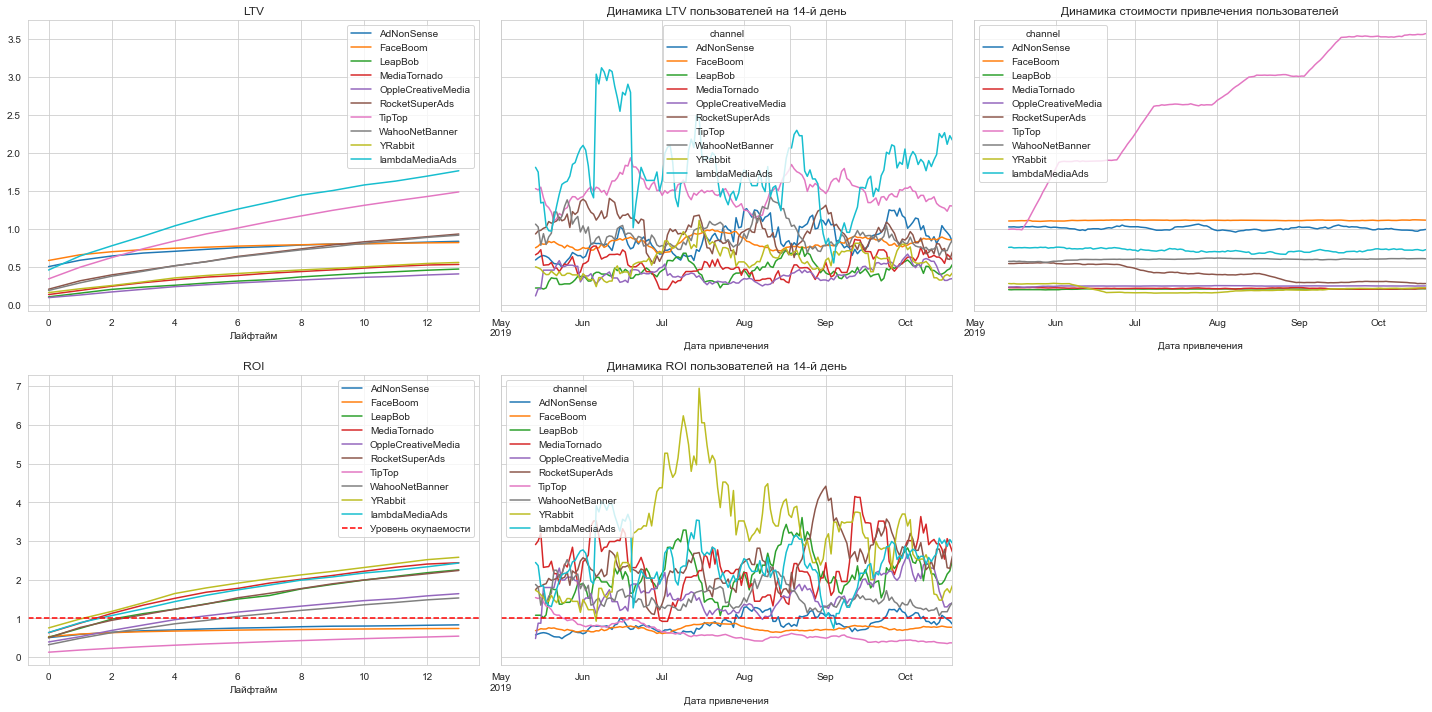

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( \
   profiles_notorganic, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Выводы:**
* Самый высокий LTV у пользователей, привлеченных lambdaMediaAds и TipTop.
* Стоимость привлечения пользователей по каналу TipTop растет от месяца к месяцу, тогда как остальные источники держатся в своем диапазоне.
* TipTop, FaceBoom и AdNonSense не выходят на уровень окупаемости. Реклама в остальных каналах окупилась со 2-5 месяца.
* Отлично окупается реклама на YRabbit.

Построим графики конверсии и удержания пользователей по каналам, чтобы оценить качество привлеченных пользователей.

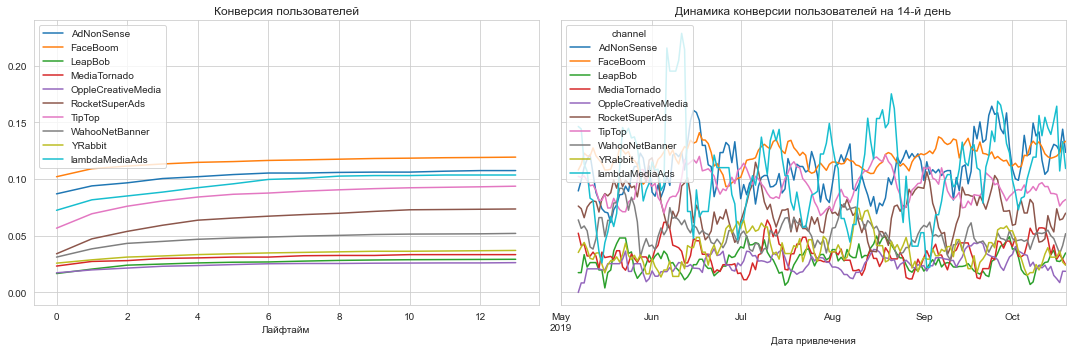

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion( \
    profiles_notorganic, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у пользователей, привлеченных FaceBoom, на втором месте — AdNonSense, на третьем — lambdaMediaAds.\
В предыдущих графиках выделялся как самый дорогой TipTop, и здесь мы видим, что он только на четвертом месте по конверсии.\
На графике динамики конверсии сильно выделяется lambdaMediaAds.

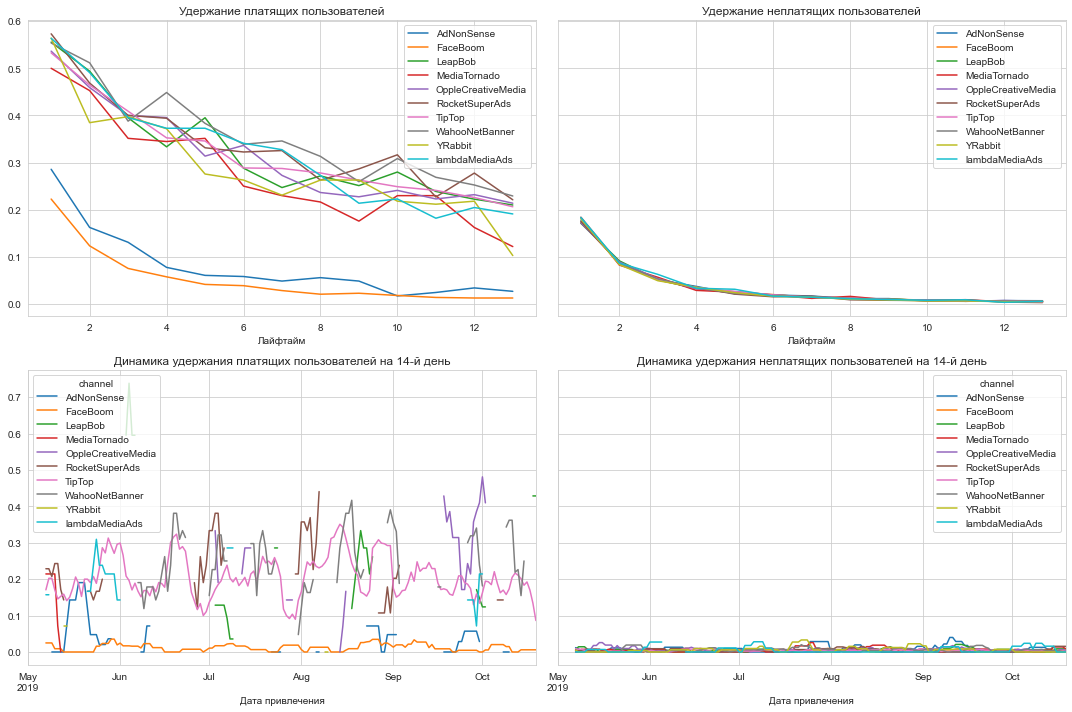

In [47]:
retention_raw, retention_grouped, retention_history = get_retention( \
    profiles_notorganic, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

Судя по графикам, имеются явные проблемы с удержанием платящих пользователей из FaceBoom и AdNonSense.

**Окупается ли реклама, направленная на привлечение пользователей в целом?** \
В бизнес-плане заложен срок, за который затраты на пользователей должны окупиться — 14 дней. Затраты на привлечение пользователей из Великобритании, Германии и Франции окупаются на 4-5 день. Однако очевидна проблема с пользователями из США: они очень дорого стоят, при этом доход от этой категории не покрывает затраты на её привлечение.\
При этом, у нас имеется информация о 10 источниках трафика, реклама в 7 из которых окупается.\
Складывается впечатление, что реклама в целом не окупается.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?** \
Траты на привлечение пользователей iPhone и Mac заметно выше трат на привлечение пользователей других устройств. Аномально высокие траты на привлечение пользователей из США. Рост стоимости привлечения пользователей всех устройств.\
Самые дорогие источники трафика — TipTop, FaceBoom и AdNonSense — не окупаются: услуги привлечения через TipTop дорогие, а FaceBoom и AdNonSense, хотя и приводят пользователей с хорошей конверсией, имеют проблему с их удержанием, что также влияет на окупаемость рекламы. 

**Чем могут быть вызваны проблемы окупаемости?** \
Неравномерное распределение инвестиций (большие вложения в некачественные источники трафика), проблемы с удержанием пользователей, неэффективная реклама (не та аудитория, несоответствие рекламы и продукта), проблемы с продуктом (наличие продукта-конкурента; сложности при использовании, отталкивающие клиента; неудобные для клиента условия работы, оплаты; ...).

## <a id='toc1_9_'></a>[Общий вывод](#toc0_)
Мы произвели анализ данных о 150008 пользователях приложения Procrastinate Pro+ из США, Великобритании, Германии и Франции. Существенная доля пользователей приложения представлена жителями США (100002), среди этой же категории — наибольшее количество платящих пользователей (6902, что составляет 6.9% от всех пользователей из США).\
Среди устройств лидирует iPhone: 54479 пользователя, из которых 3382 (6.2%) платят.\
Наибольшие траты на рекламу по каналам TipTop (54751.30) и FaceBoom (32445.60), по этим же каналам привлечено наибольшее количество пользователей: TipTop — 19561 пользователя, из которых 1878 (9.6%) платящие, и FaceBoom — 29144 пользователя, из которых 3557 (12.2%) платящие. Однако органический трафик гораздо объемнее и составляет 56439 пользователя, но среди них всего 1160 (2.1%) платят.\
Привлечение одного пользователя с помощью TipTop в среднем обошлось в 2.76, при этом траты росли каждый месяц. С помощью FaceBoom — 1.1. Стоимость привлечения по этим каналам выше средней стоимости по всем каналам, которая составила 0.73.\

В целом, реклама не окупилась. При анализе трат и окупаемости по устройствам, странам и каналам мы выявили, что причиной обнаруженных проблем являются излишние расходы на привлечение пользователей.\
Окупились расходы на привлечение пользователей PC, при том, что они являются самыми маленькими, тогда как привлечение пользователей iPhone и Mac было самым дорогим и не окупилось.\
Привлечение пользователей из Франции, Германии и Великобритании окупилось. При этом, траты на привлечение пользователей США изначально высоки и растут с каждым месяцем, и не окупаются.\
ROI 7 каналов из 10 выше уровня окупаемости. При этом наиболее емкие по тратам и приносящие объемный трафик каналы (TipTop, FaceBoom и AdNonSense), несмотря на это, не окупаются: TipTop стоит дорого и не окупается; есть проблема с удержанием пользователей, приведенных FaceBoom и AdNonSense.

Отделу маркетинга приложения Procrastinate Pro+ рекомендуется рассмотреть вопрос о целесообразности массивных инвестиций на маркетинг в странах, каналах и на устройствах, где стоимость привлечения слишком большая не покрывается доходами: в данном случае, это расходы на пользователей из США, канал TipTop, пользователи iPhone и Mac.\
В случае с каналами FaceBoom и AdNonSense, в принципе приводящими качественных пользователей с хорошей конверсией, следует поработать над удержанием пользователей.\
Также следует пересмотреть приоритеты в финансировании: хорошо окупается реклама по каналу YRabbit, окупается привлечение пользователей PC и жителей Великобритании, Германии и Франции.